# Classification of a simulated dataset
In this exercise, you'll analyze and evaluate a made-up dataset, created using Scikit-Learn's `make_classification` function. The function allows you to play with different parameters yourself, to get a feel for their effect on model performance.

The function accepts as parameters the number of samples, number of features, the number of informative features and the number of redundant features (that are highly correlated with other features, and thus carry no real information).

Import relevant packages.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Generate artificial data:

In [0]:
# Load data
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10000, n_features=20,
                                    n_informative=2, n_redundant=2, random_state=0)
X = pd.DataFrame(X)

In [0]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.830360,-0.330252,-0.230543,-0.461911,0.423043,1.198150,-0.598511,0.560084,1.172555,0.456654,-0.085175,0.120845,-0.514348,0.028474,1.432700,-0.667728,0.308132,-1.029791,1.733867,-0.599297
1,-0.043999,0.220658,1.600519,0.116929,0.390064,-1.421096,-0.633978,-0.184462,1.015490,1.941363,0.273527,1.762630,1.380094,-0.920554,0.209441,-0.564106,0.012611,-1.107534,2.005912,-0.566364
2,0.626718,2.100425,-0.965798,-0.128874,0.479240,2.158692,-0.660023,0.109196,0.619129,-0.316668,0.809642,-0.449486,-1.014526,1.222137,-0.817552,0.691953,-1.264811,-1.039763,0.941284,-1.053385
3,0.618236,-2.050204,0.197231,-1.349391,0.787622,-2.372554,-0.453772,-0.307125,1.386982,-0.872126,1.484745,-0.588555,0.866822,-1.746444,0.126735,0.473620,-0.425105,-0.679803,0.292287,-0.867680
4,1.432372,0.357851,0.439499,-0.748692,-0.941226,-0.395514,-0.256896,0.272549,-1.281665,1.235855,0.462032,0.163820,-0.992406,0.635776,-0.432270,-2.038404,-0.411067,-0.404224,0.361559,-0.411946


In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
dtypes: float64(20)
memory usage: 1.5 MB


Next, we'll set a few values as missing, and will set others as outliers.

In [0]:
proportion_of_missing_values_of_variable = [0]*5 + [0.05]*8 + [0.15]*5 + [0.3]*2
for i,proportion in enumerate(proportion_of_missing_values_of_variable):
    indices = np.where(np.random.rand(len(X))<proportion)[0]
    X.loc[indices,i] = None

In [0]:
X.loc[indices,i]

5      NaN
11     NaN
14     NaN
17     NaN
20     NaN
        ..
9991   NaN
9992   NaN
9994   NaN
9995   NaN
9997   NaN
Name: 19, Length: 2964, dtype: float64

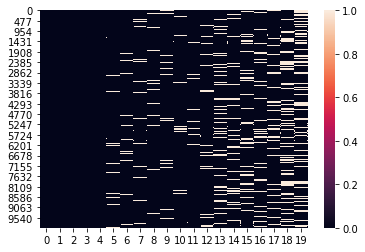

In [0]:
sns.heatmap(pd.isnull(X).astype(int))

Examine the generated dataset - its shape, variables type, summary statistics etc.

Add new cells to accomodate all the analyses and plots you'd like to make.

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       9500 non-null   float64
 6   6       9486 non-null   float64
 7   7       9484 non-null   float64
 8   8       9524 non-null   float64
 9   9       9488 non-null   float64
 10  10      9533 non-null   float64
 11  11      9502 non-null   float64
 12  12      9501 non-null   float64
 13  13      8480 non-null   float64
 14  14      8491 non-null   float64
 15  15      8464 non-null   float64
 16  16      8444 non-null   float64
 17  17      8540 non-null   float64
 18  18      6944 non-null   float64
 19  19      7036 non-null   float64
dtypes: float64(20)
memory usage: 1.5 MB


In [0]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9500.000000,9486.000000,9484.000000,9524.000000,9488.000000,9533.000000,9502.000000,9501.000000,8480.000000,8491.000000,8464.000000,8444.000000,8540.000000,6944.000000,7036.000000
mean,0.007816,-0.004494,0.015445,-0.002850,-0.002665,-0.001352,-0.001878,0.007566,0.009118,0.010949,0.009966,0.006054,-0.013663,0.021702,0.010257,0.007172,0.004213,-0.005600,-0.029708,-0.011883
std,1.005474,1.001875,0.999130,0.998927,1.009008,0.993519,0.555526,0.998087,1.001083,0.999620,0.999183,0.993362,0.997309,0.983822,0.995094,1.000064,1.004617,0.864805,1.480721,1.130994
min,-3.700948,-3.871403,-4.694588,-3.771620,-4.852118,-3.749484,-1.040471,-3.616606,-3.587351,-3.979925,-3.929792,-3.581046,-3.590903,-3.532992,-3.888444,-3.900025,-3.666662,-1.684391,-5.015571,-2.422153
25%,-0.665995,-0.672802,-0.667485,-0.664023,-0.671800,-0.664564,-0.516285,-0.676178,-0.662342,-0.664936,-0.673038,-0.661168,-0.695615,-0.645510,-0.665912,-0.669883,-0.670562,-0.860446,-1.088682,-1.014615
50%,0.009916,-0.000425,0.016093,-0.006344,0.001348,0.005903,-0.001601,-0.001392,0.007795,0.026131,0.016920,0.002882,-0.013101,0.034174,0.020106,0.007604,-0.003590,0.033877,0.087783,-0.243568
75%,0.689119,0.660038,0.683355,0.644987,0.662429,0.661300,0.341713,0.683566,0.681100,0.666047,0.689976,0.677917,0.666741,0.688883,0.678020,0.687131,0.701517,0.450327,1.048064,0.998037
max,3.815091,3.702588,3.831790,3.417029,4.285856,3.702938,1.950792,3.902132,3.844812,4.241772,3.825216,3.766942,3.693556,3.342652,3.811277,3.844825,3.268797,3.207049,5.300254,3.421909


Compute the Pearson and Spearman correlation between all variable pairs.

In [0]:
X.corr(method='pearson')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.005400,-0.008661,0.003838,-0.004401,-0.016201,0.010818,0.002026,-0.005018,-0.000741,0.002588,-0.009577,-0.007846,0.006388,-0.002268,-0.001024,-0.000950,0.012277,0.005209,0.004496
1,-0.005400,1.000000,-0.000145,-0.011906,-0.010360,-0.002512,-0.018824,0.002072,0.000557,0.009906,-0.021143,-0.018931,-0.004796,0.006038,0.005612,0.020259,0.008409,-0.018194,-0.016637,-0.022524
2,-0.008661,-0.000145,1.000000,-0.004262,0.014562,-0.013415,0.012293,0.001222,-0.001809,0.016270,0.007693,0.012367,0.010031,0.014911,0.014391,0.023636,-0.016494,0.008064,0.012593,0.023237
3,0.003838,-0.011906,-0.004262,1.000000,0.012652,0.008907,-0.010381,0.012911,0.009043,0.004306,-0.006920,-0.008279,0.012788,0.003263,0.014990,-0.002600,-0.002174,-0.011348,-0.016396,-0.013982
4,-0.004401,-0.010360,0.014562,0.012652,1.000000,0.002579,0.026683,-0.001180,0.010832,0.011774,-0.016657,-0.023943,-0.013096,0.002228,0.000935,-0.004774,0.003497,0.024941,0.003482,0.035036
5,-0.016201,-0.002512,-0.013415,0.008907,0.002579,1.000000,0.004121,0.000273,-0.006452,-0.001853,-0.018729,-0.002123,-0.008812,0.001018,-0.000900,-0.002676,-0.013920,0.003983,0.012457,0.016535
6,0.010818,-0.018824,0.012293,-0.010381,0.026683,0.004121,1.000000,-0.010920,-0.001841,-0.003696,0.007500,0.003980,-0.005636,0.003840,0.000405,0.007095,-0.005540,0.987520,-0.376842,0.871158
7,0.002026,0.002072,0.001222,0.012911,-0.001180,0.000273,-0.010920,1.000000,0.008621,0.001275,-0.002723,0.009138,-0.000148,-0.006872,-0.004614,-0.011598,0.022576,-0.016597,0.009554,-0.002464
8,-0.005018,0.000557,-0.001809,0.009043,0.010832,-0.006452,-0.001841,0.008621,1.000000,-0.009226,0.015279,-0.008859,-0.005887,-0.004545,0.014595,0.004541,0.006643,0.002981,-0.016982,0.001732
9,-0.000741,0.009906,0.016270,0.004306,0.011774,-0.001853,-0.003696,0.001275,-0.009226,1.000000,-0.001947,-0.016013,0.008823,-0.002415,0.000513,0.000141,-0.001038,-0.008600,-0.003125,0.000233


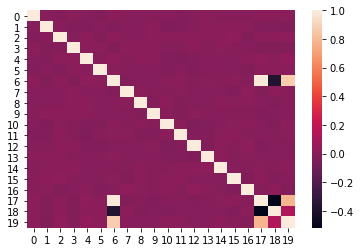

In [0]:
sns.heatmap(X.corr(method='pearson'))

In [0]:
X.corr(method='spearman')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.009541,-0.005888,0.003648,-0.008199,-0.016223,0.013174,0.002328,-0.009664,-0.003297,0.000300,-0.009602,-0.010168,0.001533,0.004151,-0.008050,-0.002072,0.013068,0.009450,0.004084
1,-0.009541,1.000000,-0.004866,-0.011291,-0.010461,-0.001110,-0.019992,0.000289,0.002729,0.013917,-0.020113,-0.022240,-0.004664,0.008317,0.002077,0.014342,0.007378,-0.020729,-0.017334,-0.026207
2,-0.005888,-0.004866,1.000000,-0.002878,0.016919,-0.005448,0.014042,-0.002030,-0.003880,0.017299,0.006898,0.010643,0.010514,0.015923,0.019244,0.021976,-0.013687,0.009114,0.011748,0.025864
3,0.003648,-0.011291,-0.002878,1.000000,0.012555,0.012466,-0.011067,0.013214,0.008460,0.005800,-0.005629,-0.007887,0.016986,0.005981,0.012998,-0.006076,-0.004907,-0.009922,-0.012221,-0.015097
4,-0.008199,-0.010461,0.016919,0.012555,1.000000,0.005958,0.026661,-0.001580,0.008988,0.011668,-0.011103,-0.023675,-0.012797,-0.002553,0.000060,-0.004687,0.004140,0.024217,0.006550,0.034038
5,-0.016223,-0.001110,-0.005448,0.012466,0.005958,1.000000,0.004368,0.003369,-0.007738,-0.004756,-0.019636,0.003290,-0.003941,0.003311,-0.004436,0.002664,-0.014685,0.002448,0.013710,0.010905
6,0.013174,-0.019992,0.014042,-0.011067,0.026661,0.004368,1.000000,-0.010652,-0.005966,-0.005342,0.007246,0.000845,-0.004389,0.007579,0.001783,0.009491,-0.004700,0.982998,-0.347486,0.856666
7,0.002328,0.000289,-0.002030,0.013214,-0.001580,0.003369,-0.010652,1.000000,0.012702,0.002426,0.000023,0.007006,-0.002880,-0.008647,-0.003961,-0.008653,0.017680,-0.015461,0.012805,-0.002961
8,-0.009664,0.002729,-0.003880,0.008460,0.008988,-0.007738,-0.005966,0.012702,1.000000,-0.006312,0.011029,-0.005660,-0.011759,-0.002950,0.015093,0.003546,0.006177,0.001536,-0.021838,0.001995
9,-0.003297,0.013917,0.017299,0.005800,0.011668,-0.004756,-0.005342,0.002426,-0.006312,1.000000,-0.008303,-0.016307,0.011276,-0.004760,0.002220,0.002326,0.004985,-0.004704,-0.000417,-0.000718


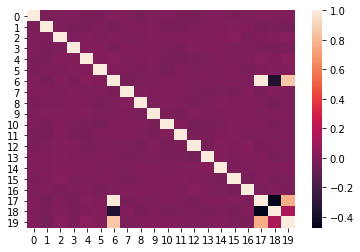

In [0]:
sns.heatmap(X.corr(method='spearman'))

Find the feature most correlated to the target variable:

In [0]:
X[20]=y

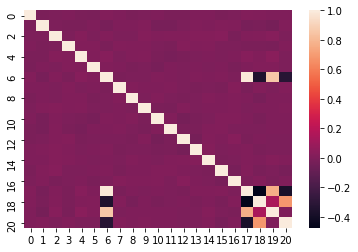

In [0]:
sns.heatmap(X.corr(method='spearman'))
#The most correlated feature to the target value is feature number 18

Impute missing values. Use 
`from sklearn.preprocessing import Imputer`

In [0]:
from sklearn.impute import SimpleImputer


In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X2=pd.DataFrame(imp.fit_transform(X))
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
dtypes: float64(21)
memory usage: 1.6 MB


Add polynomial features. Use `from sklearn.preprocessing import PolynomialFeatures`

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
X2=X2.drop(20, axis=1)
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
dtypes: float64(20)
memory usage: 1.5 MB


In [0]:
poly= PolynomialFeatures(degree=2, interaction_only=False)

In [0]:
feat=pd.DataFrame(poly.fit_transform(X2))

In [0]:
Xtot=pd.concat([X2,feat],axis=1,ignore_index=True)

In [0]:
Xtot.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.830360,-0.330252,-0.230543,-0.461911,0.423043,1.198150,-0.598511,0.560084,1.172555,0.456654,...,0.094946,-0.001725,0.534260,-0.184663,0.000031,-0.009709,0.003356,3.006295,-1.039102,0.359157
1,-0.043999,0.220658,1.600519,0.116929,0.390064,-1.421096,-0.633978,-0.184462,1.015490,1.941363,...,0.000159,-0.013967,0.025296,-0.007142,1.226632,-2.221616,0.627267,4.023684,-1.136076,0.320768
2,0.626718,2.100425,-0.965798,-0.128874,0.479240,2.158692,-0.660023,0.109196,0.619129,-0.316668,...,0.000018,-0.004380,0.003965,-0.004438,1.081106,-0.978712,1.095270,0.886016,-0.991535,1.109619
3,0.618236,-2.050204,0.197231,-1.349391,0.787622,-2.372554,-0.001878,0.007566,1.386982,-0.872126,...,0.180714,0.288988,-0.124253,0.368855,0.462132,-0.198698,0.589852,0.085432,-0.253612,0.752869
4,1.432372,0.357851,0.439499,-0.748692,-0.941226,-0.395514,-0.256896,0.272549,-1.281665,1.235855,...,0.000018,-0.001703,-0.000125,-0.001735,0.163397,0.012009,0.166518,0.000883,0.012238,0.169699


#### Linear Regression Classifier
We'll first use a simple Linear Regression as a base classifier. Use L2 regularization.  
Split data into train and test, and report below results on both the train set and the test set.

Show the classification report.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Xtot, y, test_size=0.3, random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Refael Kohen\Miniconda3\envs\AppliedDS\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1469
           1       0.80      0.77      0.78      1531

    accuracy                           0.78      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.78      0.78      0.78      3000



[[0.38833333 0.10133333]
 [0.11733333 0.393     ]]


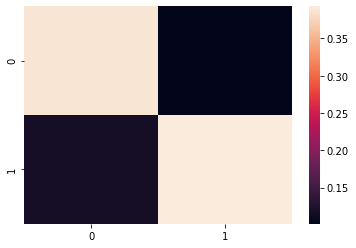

In [0]:
print(confusion_matrix(y_test,predictions)/3000)
sns.heatmap(confusion_matrix(y_test,predictions)/3000)

In [0]:
#trainSET:

In [0]:
predictions_Xtrain = logmodel.predict(X_train)

In [0]:
print(classification_report(y_train,predictions_Xtrain))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3523
           1       0.80      0.80      0.80      3477

    accuracy                           0.80      7000
   macro avg       0.80      0.80      0.80      7000
weighted avg       0.80      0.80      0.80      7000



[[0.40414286 0.09914286]
 [0.10142857 0.39528571]]


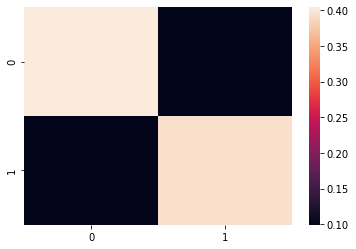

In [0]:
print(confusion_matrix(y_train,predictions_Xtrain)/7000)
sns.heatmap(confusion_matrix(y_train,predictions_Xtrain)/7000)

Show the confusion matrix as a heatmap.

In [0]:
#did it already

How do you interpret the results?

In [0]:
#it seems that there is no overfitting

What are the important features according to the classifier?  
Are these indeed the important features set when creating the data with `make_classification`?

In [0]:
a=logmodel.coef_
print (np.argmax(a))

157


#### SVM classifier
Next, we'll Perform a hyperparameter optimization for a SVM classifier. What hyperparameters do you choose to change? 

Check the effect of scaling input variables. You might want to use one of these (all under `sklearn.preprocessing`):
1. StandardScaler
1. MinMaxScaler
1. Normalizer
1. Binarizer

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

sc = StandardScaler()
mms= MinMaxScaler()
Nm=Normalizer()
Br=Binarizer()

X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform (X_test)

X_train2 = mms.fit_transform(X_train)
X_test2 = mms.transform (X_test)

X_train3 = Nm.fit_transform(X_train)
X_test3 = Nm.transform (X_test)

X_train4 = Br.fit_transform(X_train)
X_test4 = Br.transform (X_test)

from sklearn.svm import SVC
svc_model1 = SVC(probability=True)
svc_model2 = SVC(probability=True)
svc_model3 = SVC(probability=True)
svc_model4 = SVC(probability=True)

svc_model1.fit(X_train1,y_train)
svc_model2.fit(X_train2,y_train)
svc_model3.fit(X_train3,y_train)
svc_model4.fit(X_train4,y_train)

predictions1 = svc_model1.predict(X_test1)
predictions2 = svc_model2.predict(X_test2)
predictions3 = svc_model3.predict(X_test3)
predictions4 = svc_model4.predict(X_test4)

print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))

print(confusion_matrix(y_test,predictions4))
print(classification_report(y_test,predictions4))


[[1213  256]
 [ 364 1167]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1469
           1       0.82      0.76      0.79      1531

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.80      0.79      0.79      3000

[[1234  235]
 [ 353 1178]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1469
           1       0.83      0.77      0.80      1531

    accuracy                           0.80      3000
   macro avg       0.81      0.80      0.80      3000
weighted avg       0.81      0.80      0.80      3000

[[1188  281]
 [ 359 1172]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1469
           1       0.81      0.77      0.79      1531

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79    

In [0]:
#the best scaling was the StandardScaler

Plot the ROC curves of the best SVM model and the Logistic Regression model.  
Compute the AUC of both models.  
Discuss the results.

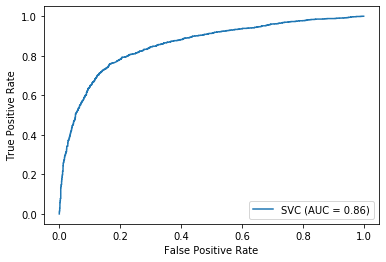

<Figure size 432x288 with 0 Axes>

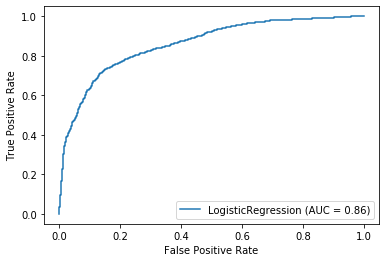

In [0]:
from sklearn.metrics import roc_curve, plot_roc_curve
import matplotlib.pyplot as plt

plot_roc_curve(svc_model1, X_test1, y_test)
plt.show()

plt.figure()
plot_roc_curve(logmodel, X_test, y_test)
plt.show()


Plot the Precision-Recall curves of the best SVM model and the Logistic Regression model. Discuss the results.

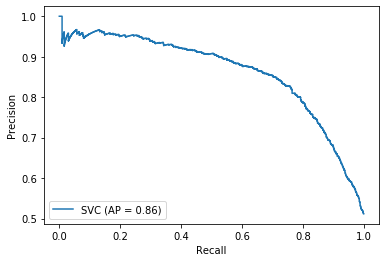

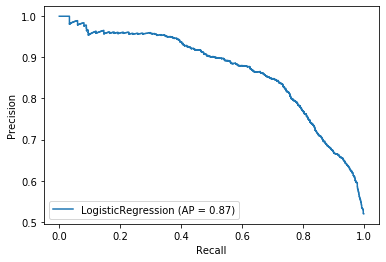

In [0]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(svc_model1, X_test1, y_test)
plt.show()

#now for the Logistic regresion:
plot_roc_curve(logmodel, X_test, y_test)
plt.show()

Good job!